In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle

In [22]:
try:
  df = pd.read_csv('/content/Mall_Customers.csv')
except:
  print("Error while loading Dataset.")

In [23]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [25]:
new_df = df[['CustomerID','Age','Annual Income (k$)', 'Spending Score (1-100)', 'Gender']]

In [26]:
new_df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,19,15,39,Male
1,2,21,15,81,Male
2,3,20,16,6,Female
3,4,23,16,77,Female
4,5,31,17,40,Female


In [27]:
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


In [29]:
new_df.drop('CustomerID',axis = 1,inplace=True)

/tmp/ipython-input-2420203164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop('CustomerID',axis = 1,inplace=True)


In [30]:
new_df

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,Male
1,21,15,81,Male
2,20,16,6,Female
3,23,16,77,Female
4,31,17,40,Female
...,...,...,...,...
195,35,120,79,Female
196,45,126,28,Female
197,32,126,74,Male
198,32,137,18,Male


<Axes: xlabel='Age', ylabel='count'>

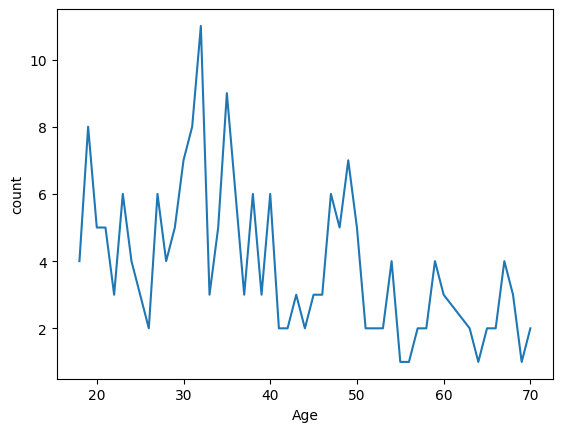

In [32]:
sns.lineplot(df['Age'].value_counts())

In [36]:
X = new_df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

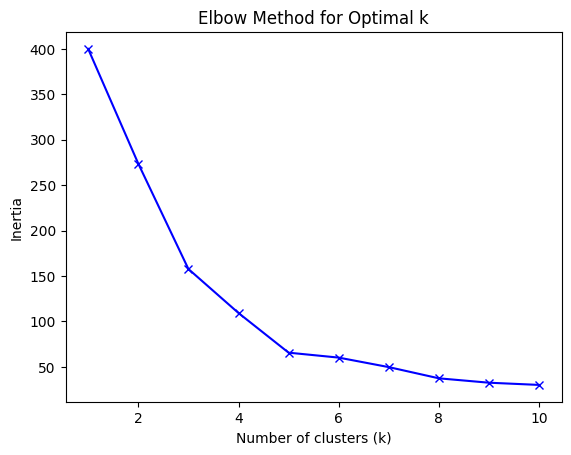

In [39]:
inertia = []
K = range(1,11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [40]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
new_df['Cluster'] = clusters

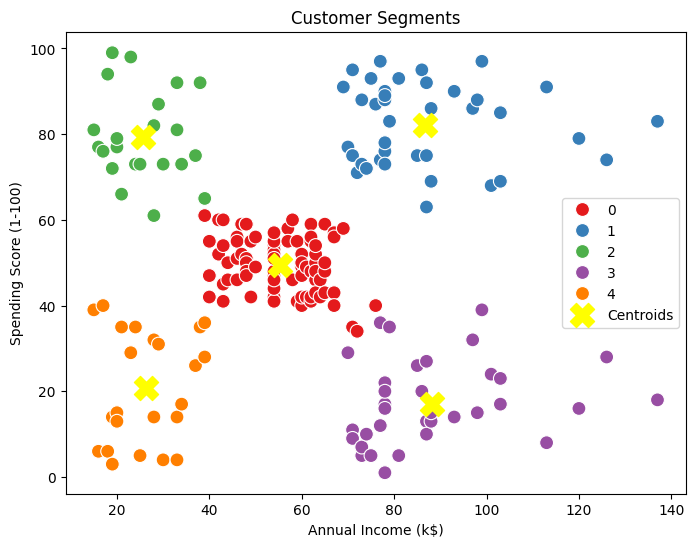

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=clusters, palette='Set1', s=100)
plt.scatter(kmeans.cluster_centers_[:,0]*X['Annual Income (k$)'].std()+X['Annual Income (k$)'].mean(),
            kmeans.cluster_centers_[:,1]*X['Spending Score (1-100)'].std()+X['Spending Score (1-100)'].mean(),
            s=300, c='yellow', label='Centroids', marker='X')
plt.title("Customer Segments")
plt.legend()
plt.show()

In [43]:
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.5546571631111091


In [44]:
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, score={score:.4f}")

k=2, score=0.3973
k=3, score=0.4666
k=4, score=0.4943
k=5, score=0.5547
k=6, score=0.5138
k=7, score=0.5020
k=8, score=0.4550
k=9, score=0.4567


In [46]:
import pickle
from sklearn.cluster import KMeans

# Train final model with optimal k=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Save the model
with open("kmeans_model.pkl", "wb") as file:
    pickle.dump(kmeans, file)

print("Model saved as kmeans_model.pkl")


Model saved as kmeans_model.pkl


In [47]:
# Load the saved model
with open("kmeans_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Predict with loaded model
clusters = loaded_model.predict(X_scaled)
print(clusters[:10])  # First 10 cluster labels


[4 2 4 2 4 2 4 2 4 2]
